In [ ]:
What is the primary purpose of convolution in a CNN?
B. Extract spatial features

What is the role of a pooling layer in a CNN?
B. Reduce computation by down-sampling

Which of the following is a commonly used activation function in CNNs?
B. ReLU

What does the stride parameter control in a convolution operation?
C. The step size while sliding the filter

What is padding in CNNs used for?
B. Preserve spatial dimensions of the input

What happens to the number of parameters when you increase the number of filters in a convolutional layer?
C. Increases

Which of these layers is not typically used in a CNN?
D. Recurrent layer

What type of pooling operation takes the maximum value in each window?
B. Max pooling

What is a kernel in the context of CNNs?
A. A filter used to extract features from an image

Which of the following techniques can help prevent overfitting in CNNs?
D. All of the above

What was the size of the input image in AlexNet?
C. 227×227

How many convolutional layers are present in the original AlexNet architecture?
B. 5

What was the main reason for using ReLU activation in AlexNet?
A. To make training faster

Which optimization algorithm was used to train AlexNet?
A. SGD with momentum

What technique did AlexNet use to handle overfitting?
A. Dropout

What is the key design principle of the VGG architecture?
A. Very deep networks with small convolutional filters

What is the size of the convolutional filters used in VGG networks?
C. 3×3

Which VGG variant has 19 layers?
D. VGG19

What was a significant disadvantage of VGG networks?
B. High computational and memory requirements

What type of padding is used in VGG networks to maintain spatial dimensions after convolution?
C. Same padding

In [1]:
!pip install kagglehub

In [2]:
# Import kagglehub
import kagglehub

# Download the dataset (downloads to the current directory by default)
path = kagglehub.dataset_download("borhanitrash/animal-image-classification-dataset")

print(path)


100%|█████████████████████████████████████████████████████████████████████████████| 38.4M/38.4M [00:08<00:00, 4.95MB/s]

Extracting files...


C:\Users\91950\.cache\kagglehub\datasets\borhanitrash\animal-image-classification-dataset\versions\1


In [ ]:
# Import kagglehub
import kagglehub
import shutil
import os

# Define the folder where you want to save the dataset
folder = r"C:\Users\91950\Downloads\cnnproj"

# Ensure the target folder exists
os.makedirs(folder, exist_ok=True)

# Download the dataset (downloads to the current directory by default)
path = kagglehub.dataset_download("borhanitrash/animal-image-classification-dataset")

# Move the downloaded dataset to the desired folder
shutil.move(path,folder)

# Print the new path where the dataset is saved
new_path = os.path.join(folder, os.path.basename(path))
print("Path to dataset files:", new_path)


In [2]:
#task 1
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from PIL import Image

# Define dataset directory
dataset_dir = "C:/Users/91950/Downloads/cnnproj/1/Animals"
categories = ["cats", "dogs", "snakes"]

# Preprocessing parameters
img_size = (224, 224)

# Initialize lists for data and labels
data = []
labels = []

# Load and preprocess images
for category in categories:
    folder_path = os.path.join(dataset_dir, category)
    label = categories.index(category)  # Label encoding: cats=0, dogs=1, snakes=2
    for img_file in os.listdir(folder_path):
        try:
            # Load image
            img_path = os.path.join(folder_path, img_file)
            img = Image.open(img_path).convert('RGB')
            img = img.resize(img_size)  # Resize to 224x224
            data.append(np.array(img))
            labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_file}: {e}")

# Convert to numpy arrays
data = np.array(data) / 255.0  # Normalize pixel values to [0, 1]
labels = to_categorical(labels, num_classes=len(categories))  # One-hot encode labels

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [3]:
#task 2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the CNN model
model = Sequential([
    # Convolutional layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    
    # Flatten and fully connected layers
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(categories), activation='softmax')  # Output layer
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

C:\Users\91950\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 346112)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      44,302,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,404,163 (169.39 MB)

 Trainable params: 44,404,163 (169.39 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\91950\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 58s 744ms/step - accuracy: 0.3631 - loss: 1.5128 - val_accuracy: 0.5817 - val_loss: 0.8952
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 57s 752ms/step - accuracy: 0.5277 - loss: 0.9286 - val_accuracy: 0.6400 - val_loss: 0.7791
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 54s 715ms/step - accuracy: 0.6000 - loss: 0.8070 - val_accuracy: 0.6133 - val_loss: 0.8412
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 53s 710ms/step - accuracy: 0.6461 - loss: 0.7486 - val_accuracy: 0.6583 - val_loss: 0.7207
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 54s 714ms/step - accuracy: 0.6046 - loss: 0.7849 - val_accuracy: 0.5617 - val_loss: 1.0112
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 54s 713ms/step - accuracy: 0.6346 - loss: 0.7697 - val_accuracy: 0.7150 - val_loss: 0.6706
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 53s 702ms/step - accuracy: 0.6605 - loss: 0.7268 - val_accuracy: 0.6833 - val_loss: 0.6920
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 52s 698ms/step - accuracy: 0.6484 - loss: 0.7274 - val_accu

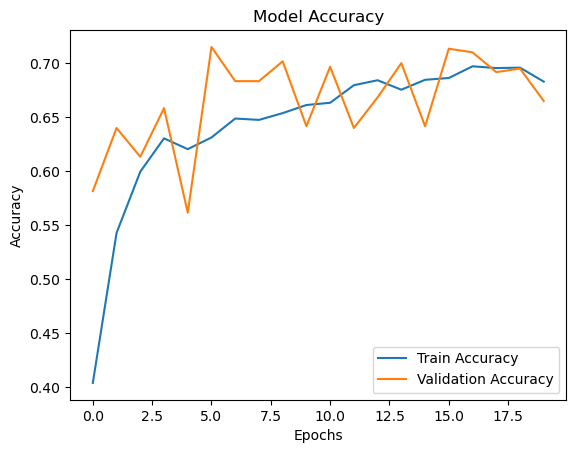

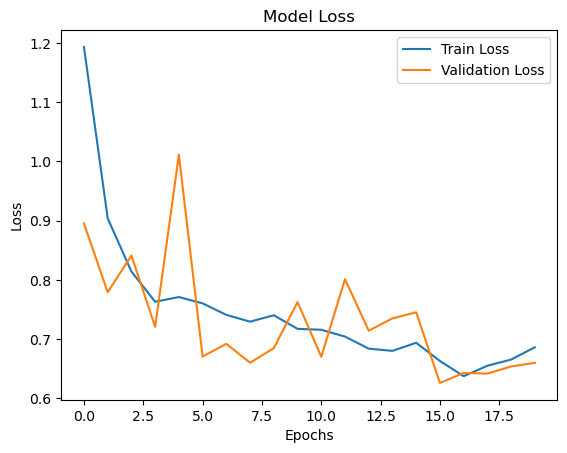

In [4]:
#task 3
# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=20,
    verbose=1
)

# Plot accuracy and loss
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the model
model.save('C:/Users/91950/Downloads/cnnproj/model.h5')